# Tarea - Ajuste de curvas

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.optimize as op

%matplotlib inline

---
### Problema 1

Los siguientes datos representan el costo en dólares de la electricidad según Western Electricity Coordinating Council desde el 2014 (y su pronóstico para el 2040)

Tomado de:
https://www.quandl.com/data/EIA/AEO_2016_REF_NO_CPP_PRCE_NA_COMM_NA_ELC_NA_WECCRKS_NCNTPKWH_A-Electricity-End-Use-Prices-Commercial-Western-Electricity-Coordinating-Council-Rockies-No-CPP-AEO2016

In [3]:
# Datos extraidos de la página de quandl
data = np.array([10.051101,  9.259127,  9.444813,  9.557723,  9.977324, 10.298326,
       10.447217, 10.550506, 10.590784, 10.657418, 10.743085, 10.831965,
       10.988435, 11.153055, 11.313326, 11.557165, 11.860136, 12.122511,
       12.356448, 12.611391, 12.814569, 13.111372, 13.357134, 13.559012,
       13.85861 , 14.135924, 14.436149])

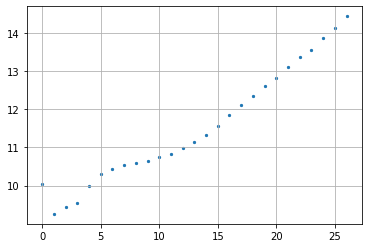

In [4]:
#Generamos nuestras variables
x1 = np.linspace(start= 0, 
                stop= 26, 
                num=len(data))
y1=data

#Graficamos los datos 
plt.figure()
plt.scatter(x1,y1, s=5)
plt.grid()

1. Ajuste estos datos a polinomios de grado 1 hasta 3 (los datos en $x$ corresponden a los años de 2014 a 2040, sin embargo son valores muy grandes para elevarlos a una potencia, use una representación para estos años, por ejemplo $2014 \rightarrow 0$ y $2040\rightarrow 26$).

2. Muestre las tres curvas ajustadas junto a los datos de los costos en un solo gráfico

In [5]:
#Hacemos nuestra funcion de costo para un polinomio de 1°Orden
def funcion_costo_1(theta,x,y):
    prediccion=theta[0]+theta[1]*x #Polinomio de primer orden
    costo=y-prediccion
    return np.sum(costo**2)

In [6]:
#Valores de theta para el polinomio de 1°Orden
theta_inicial_1=np.random.rand(2) #2 por el orden del polinomio

sol1=op.minimize(funcion_costo_1,
                theta_inicial_1,
                args=(x1,y1))

In [7]:
#Hacemos nuestra funcion de costo para un polinomio de 2°Orden
def funcion_costo_2(theta,x,y):
    prediccion=theta[0]+theta[1]*x+theta[2]*x**2 #Polinomio de segundo orden
    costo=y-prediccion
    return np.sum(costo**2)

In [8]:
#Valores de theta para el polinomio de 2°Orden
theta_inicial_2=np.random.rand(3) #3 por el orden del polinomio

sol2=op.minimize(funcion_costo_2,
                theta_inicial_2,
                args=(x1,y1))

In [9]:
#Hacemos nuestra funcion de costo para un polinomio de 3°Orden
def funcion_costo_3(theta,x,y):
    prediccion=theta[0]+theta[1]*x+theta[2]*x**2+theta[3]*x**3 #Polinomio de tercer orden
    costo=y-prediccion
    return np.sum(costo**2)

In [10]:
#Valores de theta para el polinomio de 3°Orden
theta_inicial_3=np.random.rand(4) #4 por el orden del polinomio

sol3=op.minimize(funcion_costo_3,
                theta_inicial_3,
                args=(x1,y1))

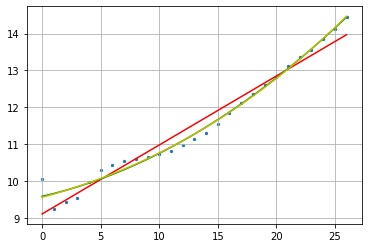

In [11]:
#Graficamos los datos originales con la funcion de costo
plt.figure()
plt.scatter(x1, y1, s=5) #Grafica original
plt.plot(x1, sol1.x[0] + sol1.x[1]*x1, "r") #Grafica con polinomio 1°Orden
plt.plot(x1, sol2.x[0] + sol2.x[1]*x1 + sol2.x[2]*x1**2, "g") #Grafica con polinomio 2°Orden
plt.plot(x1, sol3.x[0] + sol3.x[1]*x1 + sol3.x[2]*x1**2 + sol3.x[3]*x1**3, "y") #Grafica con polinomio 3°Orden
plt.grid()

El segundo y tercer ajuste (curvas verde y azul) son demaciado similares por lo que se superponen entre ellas.

---

___
### Problema 2

El archivo `population_data.csv` contiene información histórica anual de México relativa a la población, nacimientos y muertes desde el año 1950 hasta el año 2015. La primer columna corresponde a los años, la segunda a la población, la tercera a los nacimientos y la última a los decesos.

Tomado de: https://en.wikipedia.org/wiki/Demographics_of_Mexico.

Importe estos datos usando la función `read_csv` del paquete `pandas`

1. Usando los años como variable independiente $x$ y la población como variable dependiente $y$, ajustar polinomios de grado 1 hasta grado 3.

    * Mostrar en un solo gráfico los datos de población contra los años, y los polinomios ajustados.

    * Graficar el error cuadrático acumulado contra el número de términos.

2. Repetir el punto 1 usando los nacimientos como variable dependiente $y$. Grafique las curvas ajustadas junto con los datos de nacimientos. Vea en un gráfico el error acumulado.

In [12]:
import pandas as pd

data = pd.read_csv("C:\\Users\\Admin\\Documents\\ITESO\\6°Semestre\\Simulación matematica\\Semana 6\\Tarea 03 - Ajuste de curvas\\population_data.csv")
data

,Year,Poblacion,Nacimientos,Decesos
0,1950,28296,1174947,418430
1,1951,29110,1183788,458238
2,1952,29980,1195209,408823
3,1953,30904,1261775,446127
4,1954,31880,1339837,378752
...,...,...,...,...
61,2011,115683,2586287,590693
62,2012,117054,2498880,602354
63,2013,118395,2478889,623599
64,2014,119713,2463420,633641


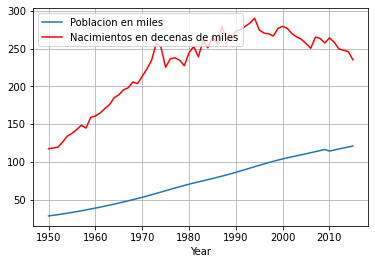

In [13]:
# Se muestra la gráfica. Vea como los datos son escalados, esto le ayudará en el cálculo
# de la regresión.

plt.plot(data.values[:,0],data.values[:,1]/1000,label=data.columns[1]+' en miles')
plt.plot(data.values[:,0],data.values[:,2]/10000,'r',label=data.columns[2]+' en decenas de miles')
plt.legend(loc=2)
plt.xlabel(data.columns[0])
plt.grid()

---

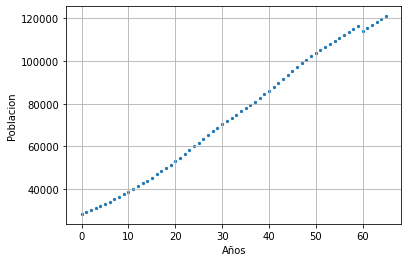

In [14]:
#Declaramos varibles
x2=data["Year"]-1950
y2=data["Poblacion"]

#Hacemos la grafica
plt.figure()
plt.scatter(x2,y2,s=5)
plt.xlabel("Años")
plt.ylabel("Poblacion")
plt.grid()

In [15]:
#Valores de theta para el polinomio de 1°Orden
sol21=op.minimize(funcion_costo_1,
                theta_inicial_1,
                args=(x2,y2))

In [16]:
#Valores de theta para el polinomio de 2°Orden
sol22=op.minimize(funcion_costo_2,
                theta_inicial_2,
                args=(x2,y2))

In [17]:
#Valores de theta para el polinomio de 3°Orden
sol23=op.minimize(funcion_costo_3,
                theta_inicial_3,
                args=(x2,y2))

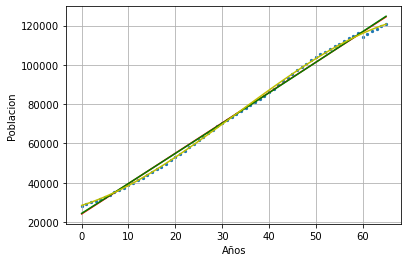

In [18]:
#Graficamos los datos originales con la funcion de costo
plt.figure()
plt.scatter(x2, y2, s=5) #Grafica original
plt.plot(x2, sol21.x[0] + sol21.x[1]*x2, "r") #Grafica con polinomio 1°Orden
plt.plot(x2, sol22.x[0] + sol22.x[1]*x2 + sol22.x[2]*x2**2, "g") #Grafica con polinomio 2°Orden
plt.plot(x2, sol23.x[0] + sol23.x[1]*x2 + sol23.x[2]*x2**2 + sol23.x[3]*x2**3, "y") #Grafica con polinomio 2°Orden
plt.xlabel("Años")
plt.ylabel("Poblacion")
plt.grid()

Podemos notar que todos los ajustes son muy similares, por lo que es dificil distinguirlos entre si al graficarlos todos al mismo tiempo.

Ahora graficando el numero de nacimientos

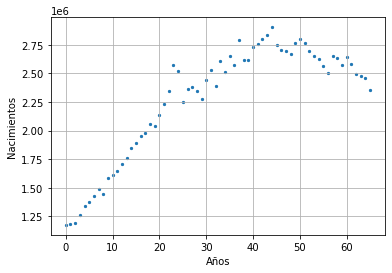

In [19]:
#Declaramos varibles
y3=data["Nacimientos"]

#Hacemos la grafica
plt.figure()
plt.scatter(x2,y3,s=5)
plt.xlabel("Años")
plt.ylabel("Nacimientos")
plt.grid()

In [20]:
#Valores de theta para el polinomio de 1°Orden
sol31=op.minimize(funcion_costo_1,
                theta_inicial_1,
                args=(x2,y3))

In [21]:
#Valores de theta para el polinomio de 2°Orden
sol32=op.minimize(funcion_costo_2,
                theta_inicial_2,
                args=(x2,y3))

In [22]:
#Valores de theta para el polinomio de 3°Orden
sol33=op.minimize(funcion_costo_3,
                theta_inicial_3,
                args=(x2,y3))

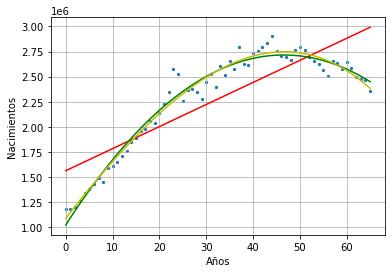

In [23]:
#Graficamos los datos originales con la funcion de costo
plt.figure()
plt.scatter(x2, y3, s=5) #Grafica original
plt.plot(x2, sol31.x[0] + sol31.x[1]*x2, "r") #Grafica con polinomio 1°Orden
plt.plot(x2, sol32.x[0] + sol32.x[1]*x2 + sol32.x[2]*x2**2, "g") #Grafica con polinomio 2°Orden
plt.plot(x2, sol33.x[0] + sol33.x[1]*x2 + sol33.x[2]*x2**2 + sol33.x[3]*x2**3, "y") #Grafica con polinomio 3°Orden
plt.xlabel("Años")
plt.ylabel("Nacimientos")
plt.grid()

En esta gráfica nos es mas facil diferenciar entre los diferentes polinomios, podemos notar que el ajuste con el polinomio de 2° y 3° Orden son muy parecidos mientras que el de 1° no muy apropiado para representar los datos.